### RMSprop 
In RMS prob we calculate the exponentially weighted averages of the square of the gradients. The RMSprop updates are calculated as given in the equations below.



RMSprop updates are calculated using 

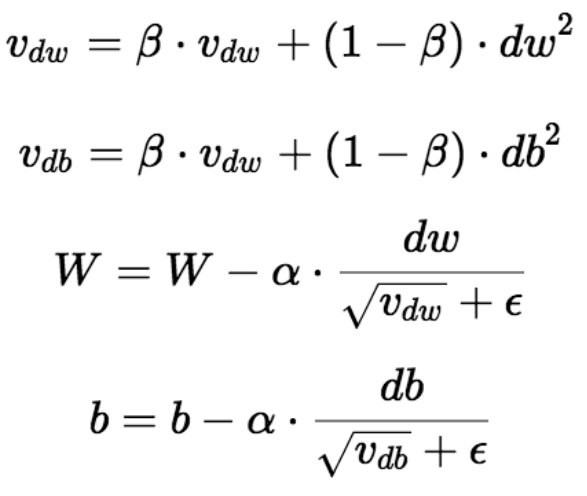

In [57]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [58]:
# set seed for reproducibilty
np.random.seed(1) 
num_samples = 100
X = np.random.uniform(-1.,1.,num_samples)
m = 2.5
b = 1
y = m*X +b # y = 2.5X + 1 

In [59]:
X

array([-0.16595599,  0.44064899, -0.99977125, -0.39533485, -0.70648822,
       -0.81532281, -0.62747958, -0.30887855, -0.20646505,  0.07763347,
       -0.16161097,  0.370439  , -0.5910955 ,  0.75623487, -0.94522481,
        0.34093502, -0.1653904 ,  0.11737966, -0.71922612, -0.60379702,
        0.60148914,  0.93652315, -0.37315164,  0.38464523,  0.7527783 ,
        0.78921333, -0.82991158, -0.92189043, -0.66033916,  0.75628501,
       -0.80330633, -0.15778475,  0.91577906,  0.06633057,  0.38375423,
       -0.36896874,  0.37300186,  0.66925134, -0.96342345,  0.50028863,
        0.97772218,  0.49633131, -0.43911202,  0.57855866, -0.79354799,
       -0.10421295,  0.81719101, -0.4127717 , -0.42444932, -0.73994286,
       -0.96126608,  0.35767107, -0.57674377, -0.46890668, -0.01685368,
       -0.89327491,  0.14823521, -0.70654285,  0.17861107,  0.39951672,
       -0.79533114, -0.17188802,  0.38880032, -0.17164146, -0.90009308,
        0.07179281,  0.32758929,  0.02977822,  0.88918951,  0.17

In [60]:
y

array([ 0.58511002,  2.10162247, -1.49942813,  0.01166286, -0.76622055,
       -1.03830703, -0.56869894,  0.22780364,  0.48383737,  1.19408367,
        0.59597257,  1.9260975 , -0.47773875,  2.89058718, -1.36306203,
        1.85233755,  0.58652401,  1.29344914, -0.79806531, -0.50949255,
        2.50372284,  3.34130788,  0.06712089,  1.96161308,  2.88194576,
        2.97303332, -1.07477894, -1.30472608, -0.6508479 ,  2.89071252,
       -1.00826583,  0.60553813,  3.28944765,  1.16582642,  1.95938557,
        0.07757816,  1.93250464,  2.67312836, -1.40855861,  2.25072157,
        3.44430544,  2.24082827, -0.09778004,  2.44639664, -0.98386997,
        0.73946763,  3.04297752, -0.03192926, -0.06112331, -0.84985714,
       -1.40316521,  1.89417766, -0.44185942, -0.1722667 ,  0.9578658 ,
       -1.23318727,  1.37058803, -0.76635713,  1.44652768,  1.9987918 ,
       -0.98832786,  0.57027994,  1.97200079,  0.57089635, -1.25023271,
        1.17948203,  1.81897323,  1.07444556,  3.22297378,  1.43

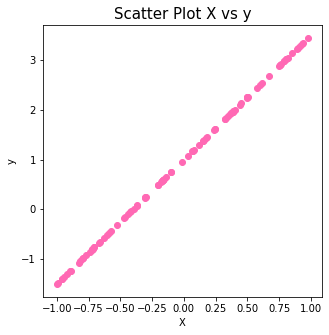

In [61]:
plt.figure(figsize=(5,5))
plt.scatter(X,y,color = 'hotpink')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Scatter Plot X vs y",fontsize=15)
plt.show()

In [62]:
# we are not using nesterov momentum 
def minibatchsgd_rmsprop(X, y, lr, epochs, batch_size, momentum, epsilon):
    m, b = 0.5, 0.5 # initial parameters
    log, mse = [], [] # lists to store learning process
    v_m = 0
    v_b = 0
    for epoch in range(epochs):
        total_len = len(X)
        for i in range(0, total_len, batch_size):
            Xs = X[i:i+batch_size]
            ys = y[i:i+batch_size]            
            N = len(Xs)
            f = ys - (m*Xs + b)
            gradient_m = (-2 * Xs.dot(f).sum() / N)
            gradient_b =  (-2 * f.sum() / N)
            
            v_m = (momentum*v_m) + (1 - momentum) * (gradient_m **2)
            v_b =  (momentum*v_b) + (1 - momentum) * (gradient_b **2)
            
            m = m - ( (lr * gradient_m)/( v_m ** 0.5 + epsilon))
            b = b - ( (lr * gradient_b)/( v_m ** 0.5 + epsilon))
            log.append((m, b))
            mse.append(mean_squared_error(y, (m*X + b)))        
    return m, b, log, mse

In [63]:
momentum = 0.9
lr = 0.05 # learning rate is not scaled by (1-momentum)
epochs = 8
batch_size = 10
epsilon = 1e-08
m, b, log, mse = minibatchsgd_rmsprop(X, y, lr, epochs, batch_size, momentum, epsilon)

In [64]:
m,b, mse[-1]

(2.500000366541509, 0.9999980870880228, 3.7455254420935075e-12)

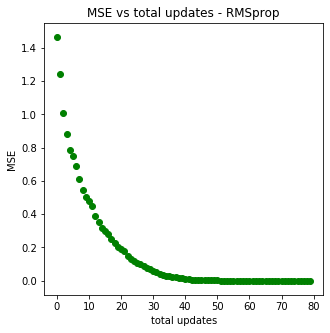

In [65]:
total_updates = int(epochs*(len(X)/batch_size))
epochs = range(total_updates)
plt.figure(figsize=(5,5))
plt.scatter(epochs, mse, color = 'green')
plt.title("MSE vs total updates - RMSprop")
plt.xlabel("total updates")
plt.ylabel("MSE")
plt.show()

References:
    https://deepnotes.io/sgd-momentum-adaptive
    https://towardsdatascience.com/learning-parameters-part-5-65a2f3583f7d

### Adam
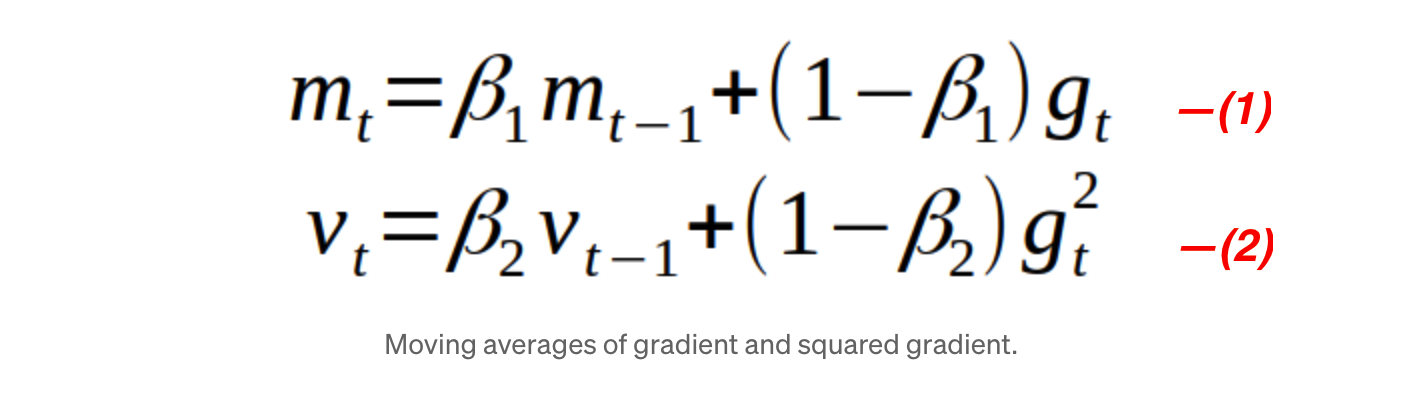
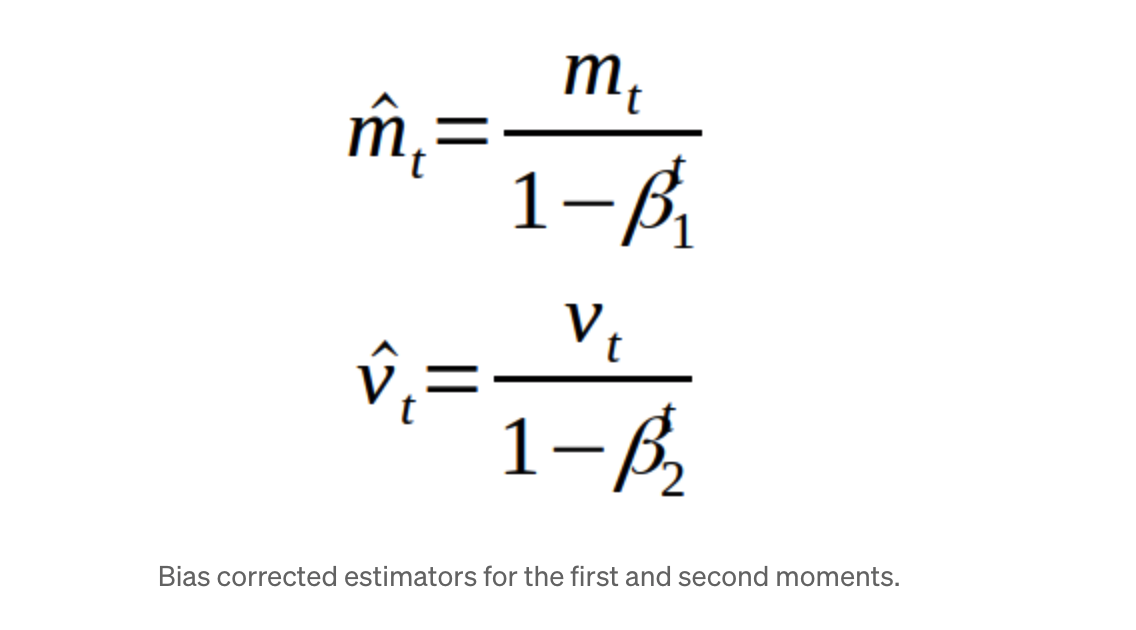
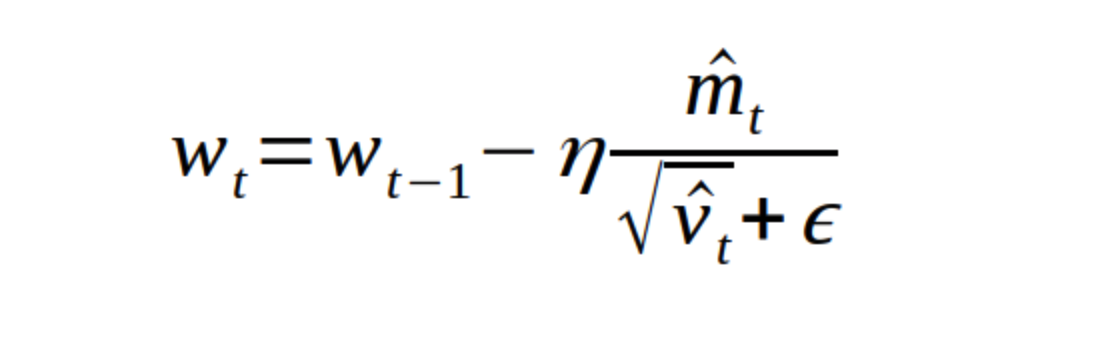

In [66]:
# we are not using nesterov momentum 
def minibatchsgd_adam(X, y, lr, epochs, batch_size, beta1, beta2, epsilon):
    m, b = 0.5, 0.5 # initial parameters
    log, mse = [], [] # lists to store learning process
    m_m = 0
    m_b = 0
    v_m = 0
    v_b = 0
    number_of_iterations = 0
    total_len = len(X)
    for epoch in range(epochs):
        
        for i in range(0, total_len, batch_size):
            number_of_iterations += 1
            Xs = X[i:i+batch_size]
            ys = y[i:i+batch_size]            
            N = len(Xs)
            f = ys - (m*Xs + b)
            gradient_m = (-2 * Xs.dot(f).sum() / N)
            gradient_b = (-2 * f.sum() / N)
                
            m_m = (beta1*m_m) + (1-beta1)*gradient_m 
            m_b = (beta1*m_b) + (1-beta1)*gradient_b
            v_m = (beta2*v_m) + (1 - beta2) * (gradient_m **2)
            v_b =  (beta2*v_b) + (1 - beta2) * (gradient_b **2)
            
            m_m_hat = m_m / (1- (beta1**number_of_iterations))
            m_b_hat = m_b / (1- (beta1**number_of_iterations)) 
            v_m_hat = v_m / (1-(beta2**number_of_iterations))
            v_b_hat = v_b / (1-(beta2**number_of_iterations))

            
            m = m - ( (lr * m_m_hat)/ ( (v_m_hat** 0.5) + epsilon))
            b = b - ( (lr * m_b_hat)/( (v_b_hat** 0.5) + epsilon))
            
            log.append((m, b))
            mse.append(mean_squared_error(y, (m*X + b)))     
            
    return number_of_iterations, m, b, log, mse

In [67]:
beta1 = 0.9
beta2 = 0.999
lr = 0.05 # learning rate is not scaled by (1-momentum)
epochs = 10
batch_size = 10
epsilon = 1e-08
no, m, b, log, mse = minibatchsgd_adam(X, y, lr, epochs, batch_size, beta1, beta2, epsilon)

In [68]:
m, b , mse [-1]

(2.513850200823342, 0.9979734270328469, 7.23502641078341e-05)

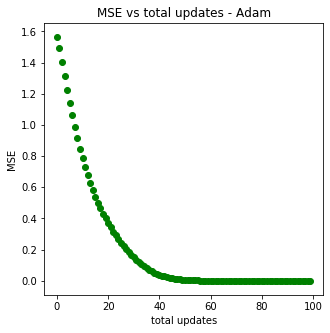

In [69]:
total_updates = int(epochs*(len(X)/batch_size))
epochs = range(total_updates)
plt.figure(figsize=(5,5))
plt.scatter(epochs, mse, color = 'green')
plt.title("MSE vs total updates - Adam")
plt.xlabel("total updates")
plt.ylabel("MSE")
plt.show()

References:
https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c

https://www.coursera.org/lecture/deep-neural-network/rmsprop-BhJlm

https://ruder.io/optimizing-gradient-descent/